In [85]:
# Importing Libraries:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
# for displaying all feature from dataset:
pd.pandas.set_option('display.max_columns', None)

In [87]:
# Reading Dataset:
dataset = pd.read_csv("Resources/Prepped_Stroke_Data.csv")
# Top 5 records:
dataset.head()

,age,gender,nhiss,severity_level,mrs,systolic,distolic,glucose,paralysis,smoking,bmi,cholestrol,tos,risk
0,75,1,4,1,1,140,89,190,1,1,25,205,1,1
1,68,1,1,1,1,133,116,174,1,0,35,206,1,1
2,88,0,1,1,1,124,118,79,2,0,35,239,1,1
3,58,0,4,1,0,126,105,198,0,0,25,222,1,1
4,50,1,3,1,2,140,106,87,0,0,39,222,1,2


In [88]:
# Dropping unneccsary feature :
dataset = dataset.drop('risk', axis=1)

In [89]:
# Shape of dataset:
dataset.shape

(4550, 13)

In [90]:
dataset.isnull().sum()

age               0
gender            0
nhiss             0
severity_level    0
mrs               0
systolic          0
distolic          0
glucose           0
paralysis         0
smoking           0
bmi               0
cholestrol        0
tos               0
dtype: int64

In [91]:
# Description:
dataset.describe()

,age,gender,nhiss,severity_level,mrs,systolic,distolic,glucose,paralysis,smoking,bmi,cholestrol,tos
count,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000
mean,46.844615,0.351209,18.643736,2.829890,3.855165,153.969451,104.305275,230.763077,1.392747,0.908791,34.194725,217.811868,2.117363
std,23.582333,0.477401,10.584101,0.937991,1.626443,24.697220,18.144888,50.459063,1.091058,0.900056,5.843633,20.245259,0.762574
min,1.000000,0.000000,1.000000,1.000000,0.000000,100.000000,59.000000,70.000000,0.000000,0.000000,18.000000,160.000000,1.000000
25%,28.000000,0.000000,12.000000,2.000000,3.000000,135.000000,92.000000,215.000000,0.000000,0.000000,29.250000,206.000000,2.000000
50%,49.000000,0.000000,18.000000,3.000000,4.000000,155.000000,105.000000,241.000000,1.000000,1.000000,34.000000,219.000000,2.000000
75%,66.000000,1.000000,25.000000,4.000000,5.000000,175.000000,119.000000,269.000000,2.000000,2.000000,39.000000,234.000000,3.000000
max,90.000000,1.000000,42.000000,4.000000,6.000000,195.000000,135.000000,295.000000,3.000000,3.000000,45.000000,253.000000,3.000000


In [92]:
# Datatypes:
dataset.dtypes

age               int64
gender            int64
nhiss             int64
severity_level    int64
mrs               int64
systolic          int64
distolic          int64
glucose           int64
paralysis         int64
smoking           int64
bmi               int64
cholestrol        int64
tos               int64
dtype: object

In [93]:
dataset[dataset['gender']=='Other']

,age,gender,nhiss,severity_level,mrs,systolic,distolic,glucose,paralysis,smoking,bmi,cholestrol,tos


In [94]:
# Gender
dataset['gender'].value_counts()

0    2952
1    1598
Name: gender, dtype: int64

In [95]:
# Gender:
print("Male    : ", dataset['gender'].value_counts()[1])
print("female  : ", dataset['gender'].value_counts()[0])

Male    :  1598
female  :  2952


In [96]:
# Smokers:
print("Smokers     : ", dataset['smoking'].value_counts()[1])
print("Non-smokers : ", dataset['smoking'].value_counts()[0])

Smokers     :  1259
Non-smokers :  1925


In [ ]:
# Good Glucose:
counter=0
for i in range(70,136):
    num=dataset["glucose"].value_counts()[i]
    counter += num


In [98]:
print("Good glucose:", counter)


Good glucose: 9


In [99]:
# High Glucose 
counter=0
for i in range(136,295):
    num=dataset["glucose"].value_counts()[i]
    counter += num

In [100]:
print("High glucose:", counter)

High glucose: 4157


In [101]:
# Good BMI:
counter=0
for i in range(70,25):
    num=dataset["bmi"].value_counts()[i]
    counter += num

In [102]:
print("Good BMI:", counter)

Good BMI: 0


In [103]:
# High BMI:
counter=0
for i in range(26,35):
    num=dataset["bmi"].value_counts()[i]
    counter += num

In [104]:
print("High BMI:", counter)

High BMI: 2092


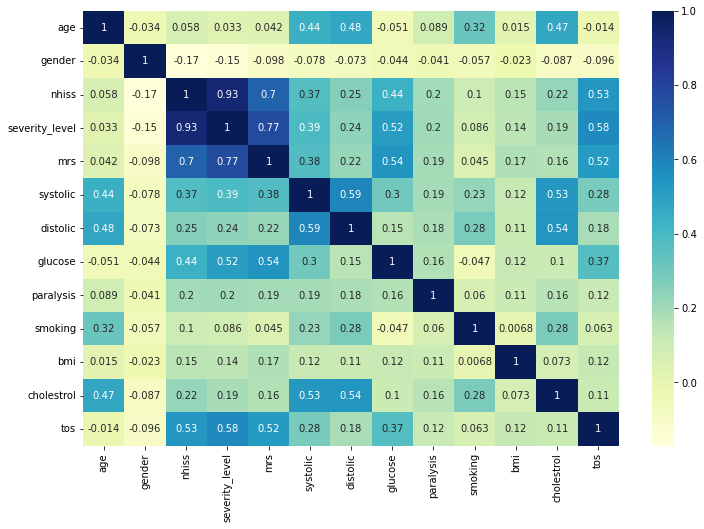

In [105]:
# Correlation using Heatmap:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [106]:
dataset.head()

,age,gender,nhiss,severity_level,mrs,systolic,distolic,glucose,paralysis,smoking,bmi,cholestrol,tos
0,75,1,4,1,1,140,89,190,1,1,25,205,1
1,68,1,1,1,1,133,116,174,1,0,35,206,1
2,88,0,1,1,1,124,118,79,2,0,35,239,1
3,58,0,4,1,0,126,105,198,0,0,25,222,1
4,50,1,3,1,2,140,106,87,0,0,39,222,1


In [107]:
# Dependent & Independent Feature:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [108]:
X.head()

,age,gender,nhiss,severity_level,mrs,systolic,distolic,glucose,paralysis,smoking,bmi,cholestrol
0,75,1,4,1,1,140,89,190,1,1,25,205
1,68,1,1,1,1,133,116,174,1,0,35,206
2,88,0,1,1,1,124,118,79,2,0,35,239
3,58,0,4,1,0,126,105,198,0,0,25,222
4,50,1,3,1,2,140,106,87,0,0,39,222


In [109]:
X = pd.get_dummies(X, drop_first=True)

In [110]:
X.head()

,age,gender,nhiss,severity_level,mrs,systolic,distolic,glucose,paralysis,smoking,bmi,cholestrol
0,75,1,4,1,1,140,89,190,1,1,25,205
1,68,1,1,1,1,133,116,174,1,0,35,206
2,88,0,1,1,1,124,118,79,2,0,35,239
3,58,0,4,1,0,126,105,198,0,0,25,222
4,50,1,3,1,2,140,106,87,0,0,39,222


In [111]:
X.columns

Index(['age', 'gender', 'nhiss', 'severity_level', 'mrs', 'systolic',
       'distolic', 'glucose', 'paralysis', 'smoking', 'bmi', 'cholestrol'],
      dtype='object')

In [112]:
X = X[['age', 'gender', 'nhiss', 'severity_level', 'mrs', 'systolic',
       'distolic', 'glucose', 'paralysis', 'smoking', 'bmi', 'cholestrol']]

In [113]:
X.head()

,age,gender,nhiss,severity_level,mrs,systolic,distolic,glucose,paralysis,smoking,bmi,cholestrol
0,75,1,4,1,1,140,89,190,1,1,25,205
1,68,1,1,1,1,133,116,174,1,0,35,206
2,88,0,1,1,1,124,118,79,2,0,35,239
3,58,0,4,1,0,126,105,198,0,0,25,222
4,50,1,3,1,2,140,106,87,0,0,39,222


In [114]:
# Train-Test Split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [115]:
print(X_train.shape)
print(X_test.shape)

(3640, 12)
(910, 12)


In [116]:
# Importing Performance Metrics:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [117]:
# RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,y_train)

# Predictions:
y_pred = RandomForest.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.676923076923077
[[180  24  24]
 [ 20 239 107]
 [ 26  93 197]]
              precision    recall  f1-score   support

           1       0.80      0.79      0.79       228
           2       0.67      0.65      0.66       366
           3       0.60      0.62      0.61       316

    accuracy                           0.68       910
   macro avg       0.69      0.69      0.69       910
weighted avg       0.68      0.68      0.68       910



# An AdaBoost classifier.

An AdaBoost [1] classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [118]:
# AdaBoostClassifier:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier()
AdaBoost = AdaBoost.fit(X_train,y_train)

# Predictions:
y_pred = AdaBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.7164835164835165
[[156  29  43]
 [ 25 289  52]
 [ 36  73 207]]
              precision    recall  f1-score   support

           1       0.72      0.68      0.70       228
           2       0.74      0.79      0.76       366
           3       0.69      0.66      0.67       316

    accuracy                           0.72       910
   macro avg       0.71      0.71      0.71       910
weighted avg       0.72      0.72      0.72       910



# Gradient Boosting for classification.

This algorithm builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the loss function, e.g. binary or multiclass log loss. Binary classification is a special case where only a single regression tree is induced.

In [119]:
# GradientBoostingClassifier:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoost = GradientBoostingClassifier()
GradientBoost = GradientBoost.fit(X_train,y_train)

# Predictions:
y_pred = GradientBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.7571428571428571
[[178  21  29]
 [ 24 288  54]
 [ 17  76 223]]
              precision    recall  f1-score   support

           1       0.81      0.78      0.80       228
           2       0.75      0.79      0.77       366
           3       0.73      0.71      0.72       316

    accuracy                           0.76       910
   macro avg       0.76      0.76      0.76       910
weighted avg       0.76      0.76      0.76       910

